In [164]:
import pandas as pd
from datetime import timedelta
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [165]:
assessments = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/iSVP1sZ7AdW7TQ')
courses = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/jmJxR8yhwCXlaw')
studentAssessment = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/DYd4M5b_8RETsA')
studentRegistration = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/lqHnH8NOZ458iw')

Посмотрим на данные и проверить на наличие пустых строк.

In [166]:
assessments

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [167]:
courses

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [168]:
studentAssessment

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [169]:
studentRegistration

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


In [170]:
assessments.isna().sum()


code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

Иметь пропуски в date нормально, так как имеется ввиду, что нет деделайна у сдачи теста.

In [171]:
courses.isna().sum()


code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

Не имеем пустых значений

In [172]:
studentAssessment.isna().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

Имеем 173 пропущенных значения. Удалим их из датасета.

In [173]:
studentAssessment = studentAssessment.dropna()

In [174]:
studentRegistration.isna().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

Имеем данные с пропущенными значениями. Для даты с отмененнной регистрацией нормально иметь Nan, это значит всего лишь то, что студент зарегистровался и продолжает учиться. Но для столбца с датой регистрации это обозначает, что скорее всего он зарегистровался два раза. Удалим данные строки.

In [175]:
studentRegistration = studentRegistration.dropna(subset = ['date_registration'])

In [ ]:
assessments.

**Курсом будет считаться – обучение в рамках одного предмета в течение семестра и сдача экзамена**.

In [303]:
courses_by_semester = assessments.query('assessment_type == "Exam"').merge(studentAssessment, on = 'id_assessment')\
    .groupby(['code_module', 'code_presentation'], as_index = False)\
    .agg({'id_student' : 'count'}).rename(columns = {'id_student' : 'value'})
courses_by_semester.pivot(index='code_module', columns='code_presentation', values='value').fillna('')


code_presentation,2013B,2013J,2014B,2014J
code_module,,,,
CCC,,,747.0,1168.0
DDD,602,968,524.0,950.0


## Задание 1. Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене)
***
Отберем студентов, удовлетворяющих критерию:  
•	Тип Assessment – Exam  
•	Успешная сдача = score>40 баллов.  
Для этого сформирум датафрейм из studentAssessment и Assessments

In [176]:
exams_assessments = assessments.query('assessment_type == "Exam"').merge(studentAssessment, on = 'id_assessment')

In [177]:
exams_assessments

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,CCC,2014B,24290,Exam,NaN,100.0,558914,230,0,32.0
1,CCC,2014B,24290,Exam,NaN,100.0,559706,234,0,78.0
2,CCC,2014B,24290,Exam,NaN,100.0,559770,230,0,54.0
3,CCC,2014B,24290,Exam,NaN,100.0,560114,230,0,64.0
4,CCC,2014B,24290,Exam,NaN,100.0,560311,234,0,100.0
...,...,...,...,...,...,...,...,...,...,...
4954,DDD,2014J,25368,Exam,NaN,100.0,652680,243,0,91.0
4955,DDD,2014J,25368,Exam,NaN,100.0,652732,249,0,47.0
4956,DDD,2014J,25368,Exam,NaN,100.0,652965,242,0,87.0
4957,DDD,2014J,25368,Exam,NaN,100.0,653051,242,0,27.0


Далее посчитаем, сколько курсов прошли успешно студенты, отберем тех, кто прошел только один,поместим в новый датафрем. Также проверим были ли те, которым могли перезачесть экзамен

In [178]:
successful_students = exams_assessments\
    .query('score >=40')\
    .groupby('id_student', as_index = False)\
    .agg({'code_module' : 'count'})\
    .rename(columns={'code_module' : 'count_courses'})\
    .query('count_courses == 1')

In [179]:
successful_students.shape[0]

3802

In [180]:
exams_assessments.query('is_banked == 1') 
#таких нет

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score


#### Ответ: **3802** студента сдали только один экзамен успешно

## Задание 2.	Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью
***


*завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

Создадим для этого два датафрейма. Один с данными об успешно сданными экзаменами, другой - с данными о всех попытках.

In [181]:
exams_assessments_success= exams_assessments\
    .query('score >= 40')\
    .groupby('id_assessment', as_index = False)\
    .id_student.nunique()
exams_assessments_success

,id_assessment,id_student
0,24290,664
1,24299,1019
2,25340,504
3,25354,878
4,25361,485
5,25368,842


In [182]:
exams_assessments_attempts= exams_assessments\
    .groupby('id_assessment', as_index = False)\
    .id_student.nunique()
exams_assessments_attempts

,id_assessment,id_student
0,24290,747
1,24299,1168
2,25340,602
3,25354,968
4,25361,524
5,25368,950


In [183]:
exams_assessments_attempts ['completion'] = round(exams_assessments_success.id_student/exams_assessments_attempts.id_student, 3)
exams_assessments_attempts

,id_assessment,id_student,completion
0,24290,747,0.889
1,24299,1168,0.872
2,25340,602,0.837
3,25354,968,0.907
4,25361,524,0.926
5,25368,950,0.886


In [184]:
exams_assessments_attempts = exams_assessments_attempts.merge(assessments, how = 'left', on = 'id_assessment')
exams_assessments_attempts

,id_assessment,id_student,completion,code_module,code_presentation,assessment_type,date,weight
0,24290,747,0.889,CCC,2014B,Exam,NaN,100.0
1,24299,1168,0.872,CCC,2014J,Exam,NaN,100.0
2,25340,602,0.837,DDD,2013B,Exam,240.0,100.0
3,25354,968,0.907,DDD,2013J,Exam,261.0,100.0
4,25361,524,0.926,DDD,2014B,Exam,241.0,100.0
5,25368,950,0.886,DDD,2014J,Exam,NaN,100.0


#### Ответ: Итак, самый сложный экзамен с id_assessment - **25340** (завершаемость равна 83.7%), самый легкий экзамен -  **25361** (завершаемость равна 92.6%). Проверим теперь самый сложный и самый легкий курс.

In [185]:
completion_success_course= exams_assessments\
    .query('score >= 40')\
    .groupby('code_module', as_index = False)\
    .id_student.nunique()
completion__course = exams_assessments\
    .groupby('code_module', as_index = False)\
    .id_student.nunique()

completion__course ['completion'] = round(completion_success_course.id_student/completion__course.id_student, 4)
completion__course

,code_module,id_student,completion
0,CCC,1915,0.8789
1,DDD,3040,0.8901


#### Ответ:Таким образом видим, что **DDD** - более простой курс, имея завершаемость 89%, а **CCC** - более сложный, имею завершаемость 87.9%

## Задание 3. По каждому предмету определи средний срок сдачи экзаменов
***


In [186]:
exams_assessments.query('score >=40').groupby('code_module', as_index = False).date_submitted.mean()

,code_module,date_submitted
0,CCC,239.345217
1,DDD,237.976006


#### Ответ: более продолжительным по сдаче является предмет ССС со средним сроком в 239,34 дней, менее продолжительным DDD со средним сроком сдачи в 237.98 дней. 

## Задание 4.Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3).
***

In [187]:
top_registrating = studentRegistration\
    .groupby('code_module', as_index=False)\
    .agg({'id_student':'nunique'})\
    .sort_values('id_student', ascending=False)

Итого, топ регистраций составил BBB, FFF, DDD. Для оттока расчитаем процент отписавшихся от предмета

In [188]:
top_retention = studentRegistration.dropna (subset=['date_unregistration'])\
    .groupby('code_module', as_index=False).agg({'id_student':'nunique'})\
    .sort_values('id_student', ascending=False) # отток в абсолютных значениях

top_retention ['retention_rate'] = round(top_retention.id_student / top_registrating.id_student, 4) #отток в относительных значениях
top_retention.sort_values('retention_rate', ascending = False)

,code_module,id_student,retention_rate
2,CCC,1851,0.4361
3,DDD,2058,0.3524
5,FFF,2239,0.3031
1,BBB,2306,0.3001
4,EEE,692,0.2421
0,AAA,116,0.1629
6,GGG,287,0.1137


Ответ: Топ регистраций BBB (7692), FFF(7397), DDD(5848). Топ оттока: CCC(43.7%), DDD(35.3%), FFF(30.4%)

## Задание 5.Используя pandas, в период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов
***

In [189]:
completion_success_semester = exams_assessments.query('score>=40')\
    .groupby('code_presentation', as_index = False)\
    .id_student.nunique() # расчет успешных сдач по семестрам
completion_semester = exams_assessments\
    .groupby('code_presentation', as_index = False)\
    .id_student.nunique() #расчет семестра всех попыток
#завершаемость = удачные сдачи/все попытки
completion_semester ['completion'] = round(completion_success_semester.id_student / completion_semester.id_student, 3)

In [190]:
completion_semester

,code_presentation,id_student,completion
0,2013B,602,0.837
1,2013J,968,0.907
2,2014B,1261,0.904
3,2014J,2068,0.877


Расчитаем средний срок сдачи

In [191]:
avg_duration = exams_assessments.groupby('code_presentation', as_index = False)\
    .agg({'date_submitted' : 'mean'})
round(avg_duration, 2)

,code_presentation,date_submitted
0,2013B,230.18
1,2013J,239.51
2,2014B,232.99
3,2014J,243.67


#### Ответ:Семестр с самой низкой завершаемостью - 2013B(83.7%), с самой долгой сдачей -  2014J  (243.67 дня). 

## Задание 6. Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. 
***

 В адаптированной кластеризации можешь выбрать следующие метрики: R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Описание подхода можно найти тут. 
Для дальнейшей работы сделаем датафрейм

In [233]:
#Recency
rfm = exams_assessments.query('score>=40').groupby('id_student', as_index = False).agg({'date_submitted' : 'mean'})\
    .rename(columns = {'date_submitted' : 'Recency'})
rfm

,id_student,Recency
0,23698,243.0
1,24213,236.0
2,27116,243.0
3,28046,237.0
4,28787,243.0
...,...,...
4092,2694886,236.0
4093,2694933,230.0
4094,2695608,237.0
4095,2697181,230.0


In [234]:
#frequency
for_frequency = exams_assessments.groupby('id_student', as_index = False).agg({'id_assessment' : 'count'}) #все попытки
for_frequency_success = exams_assessments.query('score>=40')\
    .groupby('id_student', as_index = False).agg({'id_assessment' : 'count'})#удачная сдача


rfm ['Frequency'] = for_frequency_success.id_assessment / for_frequency.id_assessment
rfm

,id_student,Recency,Frequency
0,23698,243.0,1.0
1,24213,236.0,1.0
2,27116,243.0,1.0
3,28046,237.0,1.0
4,28787,243.0,1.0
...,...,...,...
4092,2694886,236.0,1.0
4093,2694933,230.0,0.5
4094,2695608,237.0,1.0
4095,2697181,230.0,1.0


In [235]:
for_frequency_success

,id_student,id_assessment
0,23698,1
1,24213,1
2,27116,1
3,28046,1
4,28787,1
...,...,...
4092,2694886,1
4093,2694933,1
4094,2695608,1
4095,2697181,1


In [236]:
#Monetary
Monetary = exams_assessments.query('score >= 40')\
    .groupby('id_student', as_index = False).agg({'score' : 'mean'})
rfm ['Monetary'] = Monetary.score

In [237]:
rfm

,id_student,Recency,Frequency,Monetary
0,23698,243.0,1.0,80.0
1,24213,236.0,1.0,58.0
2,27116,243.0,1.0,96.0
3,28046,237.0,1.0,40.0
4,28787,243.0,1.0,44.0
...,...,...,...,...
4092,2694886,236.0,1.0,69.0
4093,2694933,230.0,0.5,73.0
4094,2695608,237.0,1.0,73.0
4095,2697181,230.0,1.0,80.0


In [238]:
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.25, .5, .75]).to_dict()
quintiles

{'Recency': {0.25: 234.0, 0.5: 241.0, 0.75: 243.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 56.0, 0.5: 69.0, 0.75: 84.0}}

Для присвоения рангов расмотрим зависимость между метриками и понимаением более успешного студента:  
Чем больше срок сдачи, тем хуже учится студент  
Чем больше завершаемость и результат, тем лучше учится студент  

Как мы видим, завершаемость нужно делить всего на два, тех, кто имеет 0.5, и тех, кто 1.  
Сроки тоже поделим на две группы ( по медиане), а успеваемость оставим на 4.Тогда 4 ранг будем ставить при отличном результате, а  1  - при наихудшем.

In [239]:
rfm.Recency.quantile(1/3)

236.0

In [240]:
rfm.Recency.quantile(2/3)

243.0

In [254]:
def r_score(x):
    if x < 241:
        return 2
    else:
        return 1
    
def f_score(x):
    if x <=0.5:
        return 1
    else:
        return 2  


def m_score(x):
    if x < 56:
        return 1
    elif x < 69:
        return 2
    elif x < 84:
        return 3
    else:
        return 4 

In [257]:
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: f_score(x))
rfm['M'] = rfm['Monetary'].apply(lambda x: m_score(x))

In [258]:
rfm

,id_student,Recency,Frequency,Monetary,R,F,M,RFM
0,23698,243.0,1.0,80.0,1,2,3,212
1,24213,236.0,1.0,58.0,2,2,2,113
2,27116,243.0,1.0,96.0,1,2,4,211
3,28046,237.0,1.0,40.0,2,2,1,114
4,28787,243.0,1.0,44.0,1,2,1,214
...,...,...,...,...,...,...,...,...
4092,2694886,236.0,1.0,69.0,2,2,3,112
4093,2694933,230.0,0.5,73.0,2,1,3,122
4094,2695608,237.0,1.0,73.0,2,2,3,112
4095,2697181,230.0,1.0,80.0,2,2,3,112


Теперь соберем все результаты 


In [259]:
rfm['RFM'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm

,id_student,Recency,Frequency,Monetary,R,F,M,RFM
0,23698,243.0,1.0,80.0,1,2,3,123
1,24213,236.0,1.0,58.0,2,2,2,222
2,27116,243.0,1.0,96.0,1,2,4,124
3,28046,237.0,1.0,40.0,2,2,1,221
4,28787,243.0,1.0,44.0,1,2,1,121
...,...,...,...,...,...,...,...,...
4092,2694886,236.0,1.0,69.0,2,2,3,223
4093,2694933,230.0,0.5,73.0,2,1,3,213
4094,2695608,237.0,1.0,73.0,2,2,3,223
4095,2697181,230.0,1.0,80.0,2,2,3,223


У нас получается 16 сегментов. Разделю на кластеры по R и M

In [253]:
#rfm.groupby('RFM', as_index = False).agg({'id_student' : 'count'})\
   # .sort_values('id_student', ascending = False)

In [263]:
segt_map = {
    r'11': 'worst students',
    r'21': 'worst and fast students',
    r'12': 'lazy students',
    r'22': 'catching up students',
    r'13': 'good but slow students',
    r'23': 'good students',
    r'14': 'best but slow students',
    r'24': 'best students',
}

rfm['Segment'] = rfm['R'].map(str) + rfm['M'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm

,id_student,Recency,Frequency,Monetary,R,F,M,RFM,Segment
0,23698,243.0,1.0,80.0,1,2,3,123,good but slow students
1,24213,236.0,1.0,58.0,2,2,2,222,catching up students
2,27116,243.0,1.0,96.0,1,2,4,124,best but slow students
3,28046,237.0,1.0,40.0,2,2,1,221,worst and fast students
4,28787,243.0,1.0,44.0,1,2,1,121,worst students
...,...,...,...,...,...,...,...,...,...
4092,2694886,236.0,1.0,69.0,2,2,3,223,good students
4093,2694933,230.0,0.5,73.0,2,1,3,213,good students
4094,2695608,237.0,1.0,73.0,2,2,3,223,good students
4095,2697181,230.0,1.0,80.0,2,2,3,223,good students


Посмотрим на распредление сегментов.


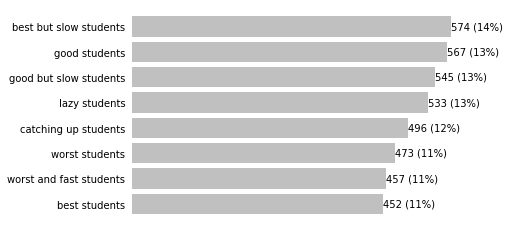

In [287]:
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

### Вывод: благодаря разбиению групп по времени сдачи всего на две  и разбиению групп по успеваемости на 4 группы, кластеры вышли примерно одного размера. Однако больше всего набюдается студентов, которые написали выше 84 баллов и при этом сдали предмет после 241 дня. В меньшей степени наблюдаются студенты, которые сдали также выше 84 баллов и при этом раньше 241 дня. 